In [1]:
import pandas as pd
import numpy as np

In [2]:
!gdown 1ZdhRqYv-JizWV6DxO6C4R_k1kxPhmlF2

Downloading...
From: https://drive.google.com/uc?id=1ZdhRqYv-JizWV6DxO6C4R_k1kxPhmlF2
To: /Volumes/Additional Drive/Projects/ML-Supervised-Learning/multiclass.csv
100%|██████████████████████████████████████| 14.6k/14.6k [00:00<00:00, 10.7MB/s]


In [3]:
df = pd.read_csv('multiclass.csv')
df.head()

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,class
0,3,12669,9656,7561,214,2674,1338,2
1,3,7057,9810,9568,1762,3293,1776,2
2,3,6353,8808,7684,2405,3516,7844,2
3,3,13265,1196,4221,6404,507,1788,1
4,3,22615,5410,7198,3915,1777,5185,1


In [4]:
df.shape

(440, 8)

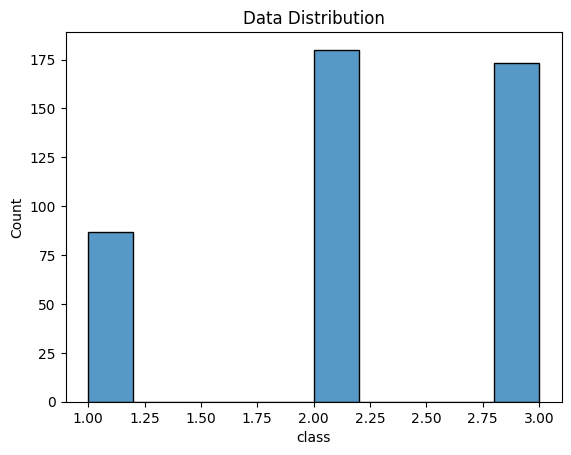

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data=df, x="class")
plt.title('Data Distribution')
plt.show()

In [6]:
X = df[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']].copy()
y = df[['class']].copy()

In [7]:
from sklearn.decomposition import PCA

In [8]:
def scatter_visualize(visualize,y_label):
  scatter = plt.scatter(visualize[:,0] ,visualize[:,1],c = y.values[:,0] )
  plt.legend(handles=scatter.legend_elements()[0], labels=['Class1','Class2','Class3'])
  plt.show()

In [9]:
# reducing features to just 2 features for visualization purpose
pca = PCA(n_components=2)
visualize = pca.fit_transform(X)

visualize.shape

(440, 2)

In [10]:
visualize[:5]

array([[  650.02212207,  1585.51909007],
       [-4426.80497937,  4042.45150884],
       [-4841.9987068 ,  2578.762176  ],
       [  990.34643689, -6279.80599663],
       [10657.99873116, -2159.72581518]])

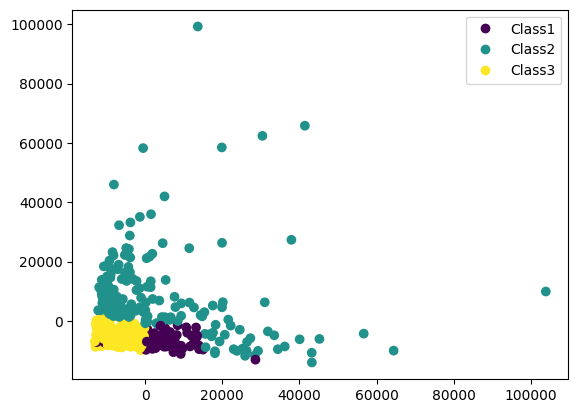

In [11]:
scatter_visualize(visualize, y)

In [12]:
# 1. non-linearly separable
# 2. more than 2 classes.

In [13]:
from sklearn.model_selection import train_test_split

X_train_val, X_test, y_train_val, y_test = train_test_split(X,y,test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val,y_train_val,test_size=0.25, random_state=42)

In [14]:
X_train.shape, y_train.shape

((264, 6), (264, 1))

In [15]:
X_val.shape, y_val.shape

((88, 6), (88, 1))

In [16]:
X_test.shape, y_test.shape

((88, 6), (88, 1))

In [17]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
# only apply smote to the training data.
X_sm, y_sm = smote.fit_resample(X_train, y_train)

In [18]:
X_sm.shape

(324, 6)

In [19]:
y_train.value_counts()

class
2        108
3        103
1         53
Name: count, dtype: int64

In [20]:
y_sm.value_counts()

class
1        108
2        108
3        108
Name: count, dtype: int64

In [21]:
X_sm.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,5963,3648,6192,425,1716,750
1,13624,295,1381,890,43,84
2,22096,3575,7041,11422,343,2564
3,9351,1347,2611,8170,442,868
4,3225,3294,1902,282,68,1114


In [22]:
X_sm.isna().sum()

Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_sm) # training data.

,copy,True
,with_mean,True
,with_std,True


In [24]:
X_train_scaled = scaler.transform(X_sm)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [31]:
y_sm = y_sm.values
y_val = y_val.values
y_test = y_test.values

In [38]:
y_sm = y_sm.reshape(-1, )
y_val = y_val.reshape(-1, )
y_test = y_test.reshape(-1, )

In [39]:
X_train_scaled.shape, y_sm.shape

((324, 6), (324,))

In [40]:
X_val_scaled.shape, y_val.shape

((88, 6), (88,))

In [45]:
from scipy.stats import mode

In [46]:
def distance(x1,x2):
  return np.sqrt(np.sum((x1-x2)**2))

In [47]:
def kNN(X_train, y_train, x_query, k = 5):
    """
    Prediction from kNN for x-query point.
    """

    # Step1: calcuate distances
    distances = []
    for i in range(X_train.shape[0]):
        d = distance(X_train[i], x_query)
        distances.append((d, y_train[i]))

    # Step2: sort the distances
    distances.sort()
    distances = distances[:k]

    distances = np.array(distances)
    labels = distances[:, -1]

    # Majority vote
    result = mode(labels)[0]

    return int(result)

In [48]:
x_query = X_val_scaled[50]
x_query

array([ 1.35936248, -0.20158026, -0.05921019,  0.26975553, -0.419991  ,
        0.31624026])

In [49]:
kNN(X_train_scaled, y_sm, x_query)

1

In [50]:
y_pred = []

for x_query in X_val_scaled:
    pred = kNN(X_train_scaled, y_sm, x_query)
    y_pred.append(pred)

y_pred = np.array(y_pred)

In [51]:
y_pred[:10]

array([2, 3, 3, 1, 3, 3, 3, 2, 1, 3])

In [52]:
y_val[:10]

array([2, 3, 3, 1, 3, 3, 3, 2, 3, 3])

In [53]:
np.mean(y_pred == y_val)

np.float64(0.9090909090909091)

In [54]:
from sklearn.metrics import accuracy_score

accuracy_score(y_val, y_pred)

0.9090909090909091

## Finding Best K

In [55]:
def k_accuracy(X_train_scaled, y_sm, X_val_scaled, y_val, k):
    y_pred = []

    for x_query in X_val_scaled:
        pred = kNN(X_train_scaled, y_sm, x_query, k=k)
        y_pred.append(pred)

    y_pred = np.array(y_pred)

    return accuracy_score(y_val, y_pred)

In [59]:
val_accuracies = []
for k in range(1, 25):
    acc = k_accuracy(X_train_scaled, y_sm, X_val_scaled, y_val, k=k)
    val_accuracies.append(acc)

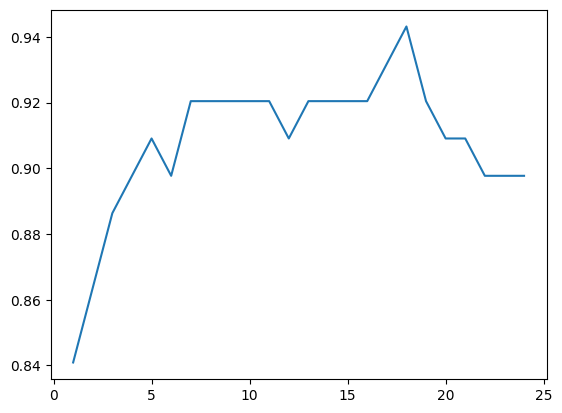

In [60]:
plt.plot(range(1, 25), val_accuracies)
plt.show()

# KNN - Sklearn Implementation

In [61]:
from sklearn.neighbors import KNeighborsClassifier

In [62]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train_scaled, y_sm) # storing the entire train data, no computaiton. 
                                # (No training happens, fit is used just to maintain consistency with other algorithms)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None
